In [139]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import umap

In [140]:
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_color_z = pd.read_csv(os.path.join(folder_path, "features_color_all_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_color_mm = pd.read_csv(os.path.join(folder_path, "features_color_all_minmax.csv"))

In [141]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_color_z_cl= df_color_z.drop(columns=['filename', 'label'])

se va a buscar el que podría ser el mejor numero de clusteres usando BIC (Bayesian Information Criterion) y AIC (Akaike Information Criterion)

Text(0.5, 1.0, 'BIC and AIC Scores Per Number Of Clusters')

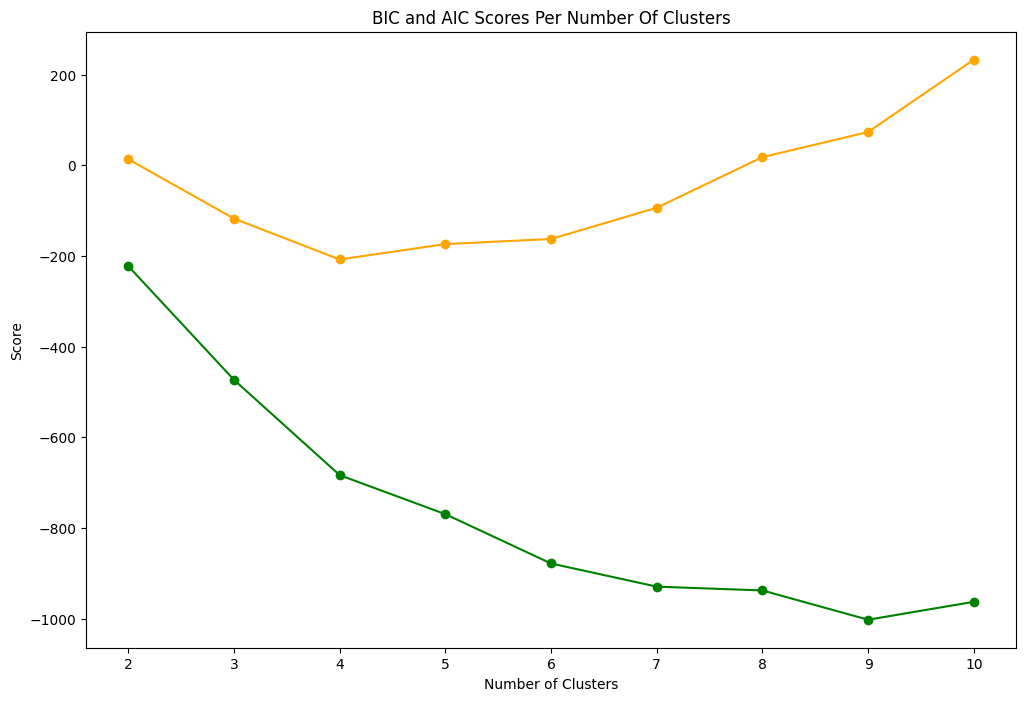

In [142]:
# Set up a range of cluster numbers to try
n_range = range(2,11)
# Create empty lists to store the BIC and AIC values
bic_score = []
aic_score = []

# Loop through the range and fit a model
for n in n_range:
    gm = GaussianMixture(n_components=n, 
                         random_state=123, 
                         n_init=10)
    gm.fit(df_color_z_cl)
    
    # Append the BIC and AIC to the respective lists
    bic_score.append(gm.bic(df_color_z_cl))
    aic_score.append(gm.aic(df_color_z_cl))
    
# Plot the BIC and AIC values together
fig, ax = plt.subplots(figsize=(12,8),nrows=1)
ax.plot(n_range, bic_score, '-o', color='orange')
ax.plot(n_range, aic_score, '-o', color='green')
ax.set(xlabel='Number of Clusters', ylabel='Score')
ax.set_xticks(n_range)
ax.set_title('BIC and AIC Scores Per Number Of Clusters')



In [143]:
n_components = 4  # Number of clusters
covariance_types = ['full', 'tied', 'diag', 'spherical']

gmm_models_z = {cov_type: GaussianMixture(n_components=n_components, covariance_type=cov_type)
              for cov_type in covariance_types}

for cov_type, gmm_model in gmm_models_z.items():
    gmm_model.fit(df_color_z_cl)

In [144]:
covariances_z = {cov_type: gmm_model.covariances_
               for cov_type, gmm_model in gmm_models_z.items()}

In [145]:
predictions_z = {cov_type: gmm_model.predict(df_color_z_cl)
               for cov_type, gmm_model in gmm_models_z.items()}

Covariance Matrix (full - Component):
[[ 0.56078614  0.56172858  0.44364562  0.11252502 -0.30826929  0.57338134]
 [ 0.56172858  0.59553987  0.47487808  0.18233574 -0.34808527  0.5826364 ]
 [ 0.44364562  0.47487808  0.48452044  0.31017433 -0.38863888  0.47343677]
 [ 0.11252502  0.18233574  0.31017433  0.50963759 -0.2989748   0.15756948]
 [-0.30826929 -0.34808527 -0.38863888 -0.2989748   0.38648525 -0.33078778]
 [ 0.57338134  0.5826364   0.47343677  0.15756948 -0.33078778  0.59141403]]
Covariance Matrix (tied - Component):
[ 0.58769226  0.54308213  0.43008807 -0.04056648 -0.24262467  0.58383211]
Covariance Matrix (diag - Component):
[0.22716354 0.18014427 0.18818048 0.50582497 0.39265683 0.210175  ]
Covariance Matrix (spherical - Component):
0.19253725179338124


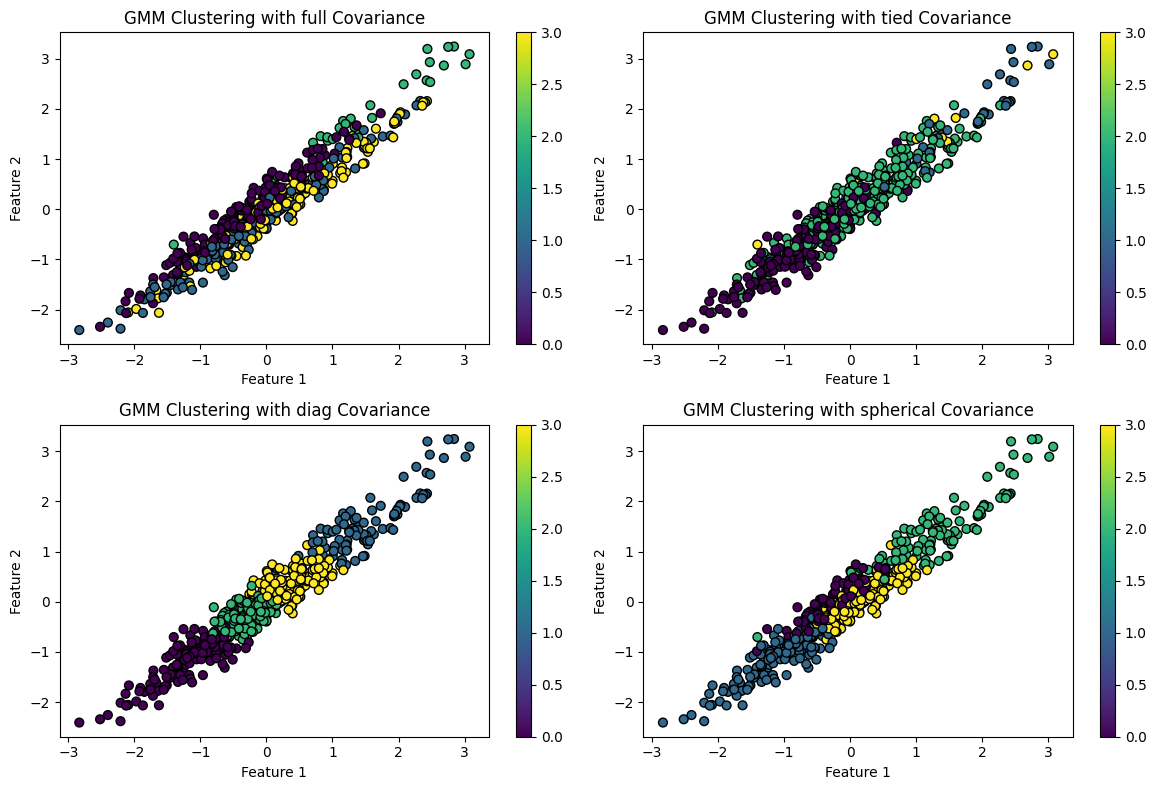

In [146]:
plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models_z.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(df_color_z_cl.iloc[:, 0], df_color_z_cl.iloc[:, 1], c=predictions_z[cov_type], cmap='viridis', edgecolors='k', s=40)
    plt.title(f'GMM Clustering with {cov_type} Covariance')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    
    print(f'Covariance Matrix ({cov_type} - Component):\n{covariances_z[cov_type][0]}')

plt.tight_layout()
plt.show()

In [147]:
print("\n--- Silhouette Scores por tipo de covarianza ---")
for cov_type in covariance_types:
    score = silhouette_score(df_color_z_cl, predictions_z[cov_type])
    print(f"{cov_type.capitalize()} covariance: Silhouette Score = {score:.3f}")


--- Silhouette Scores por tipo de covarianza ---
Full covariance: Silhouette Score = 0.093
Tied covariance: Silhouette Score = 0.108
Diag covariance: Silhouette Score = 0.217
Spherical covariance: Silhouette Score = 0.324


c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


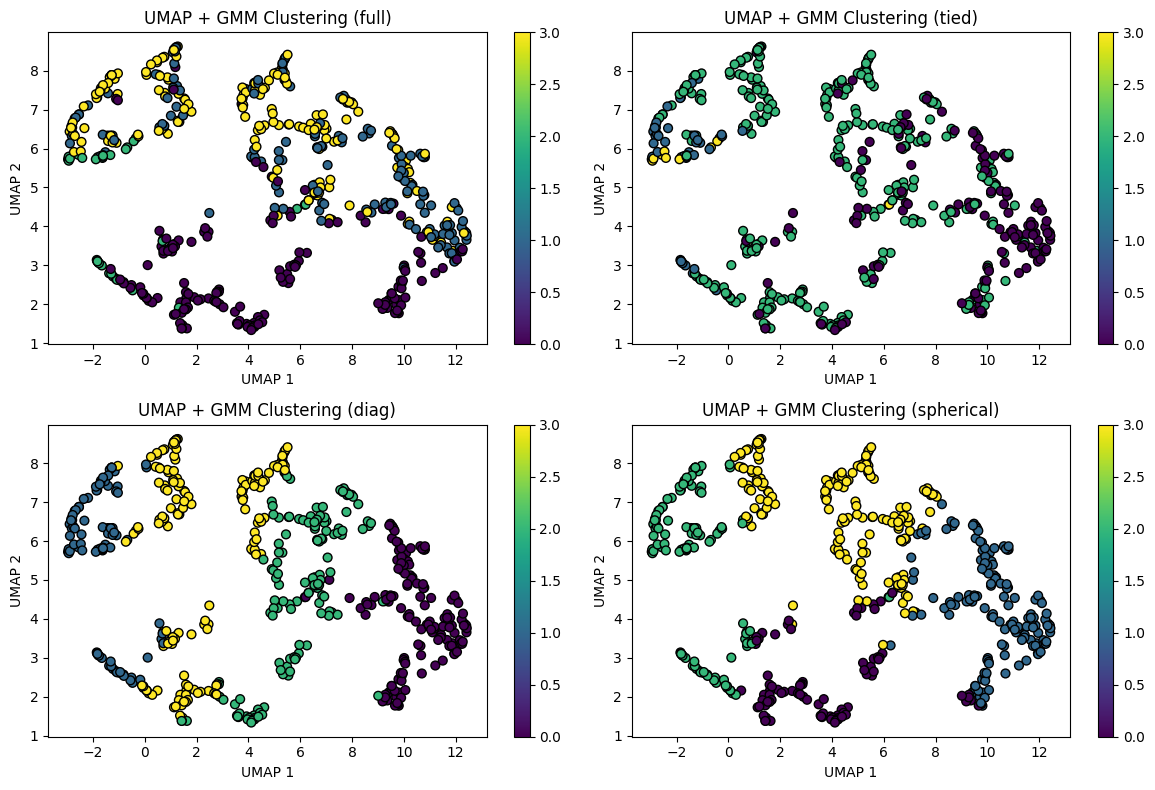

In [148]:
reducer = umap.UMAP(n_neighbors=9, n_components=2,random_state=42)
embedding = reducer.fit_transform(df_color_z_cl)

plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models_z.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(embedding[:, 0], embedding[:, 1], 
                c=predictions_z[cov_type], 
                cmap='viridis', edgecolors='k', s=40)
    plt.title(f'UMAP + GMM Clustering ({cov_type})')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.colorbar()

plt.tight_layout()
plt.show()




In [149]:

df_color_z['predictions_z_full'] = predictions_z['full']
df_color_z['predictions_z_tied'] = predictions_z['tied']
df_color_z['predictions_z_diag'] = predictions_z['diag']
df_color_z['predictions_z_spherical'] = predictions_z['spherical']

# Crear las tablas de contingencia para cada tipo de covarianza
contingency_full = pd.crosstab(df_color_z['label'], df_color_z['predictions_z_full'], rownames=['Label'], colnames=['Cluster (full)'])
contingency_tied = pd.crosstab(df_color_z['label'], df_color_z['predictions_z_tied'], rownames=['Label'], colnames=['Cluster (tied)'])
contingency_diag = pd.crosstab(df_color_z['label'], df_color_z['predictions_z_diag'], rownames=['Label'], colnames=['Cluster (diag)'])
contingency_spherical = pd.crosstab(df_color_z['label'], df_color_z['predictions_z_spherical'], rownames=['Label'], colnames=['Cluster (spherical)'])

# Mostrar las tablas de contingencia
print("Contingency Table for Full Covariance:")
print(contingency_full)

print("\nContingency Table for Tied Covariance:")
print(contingency_tied)

print("\nContingency Table for Diagonal Covariance:")
print(contingency_diag)

print("\nContingency Table for Spherical Covariance:")
print(contingency_spherical)

Contingency Table for Full Covariance:
Cluster (full)   0    1   2    3
Label                           
higher          90  101   2   75
smaller         79   49  33  108

Contingency Table for Tied Covariance:
Cluster (tied)    0   1    2   3
Label                           
higher          129   8  131   0
smaller          21  38  199  11

Contingency Table for Diagonal Covariance:
Cluster (diag)   0   1   2   3
Label                         
higher          84  33  68  83
smaller         55  59  75  80

Contingency Table for Spherical Covariance:
Cluster (spherical)   0   1   2   3
Label                              
higher               42  90  44  92
smaller              55  58  70  86


minmax

In [150]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_color_mm_cl= df_color_mm.drop(columns=['filename', 'label'])

Text(0.5, 1.0, 'BIC and AIC Scores Per Number Of Clusters')

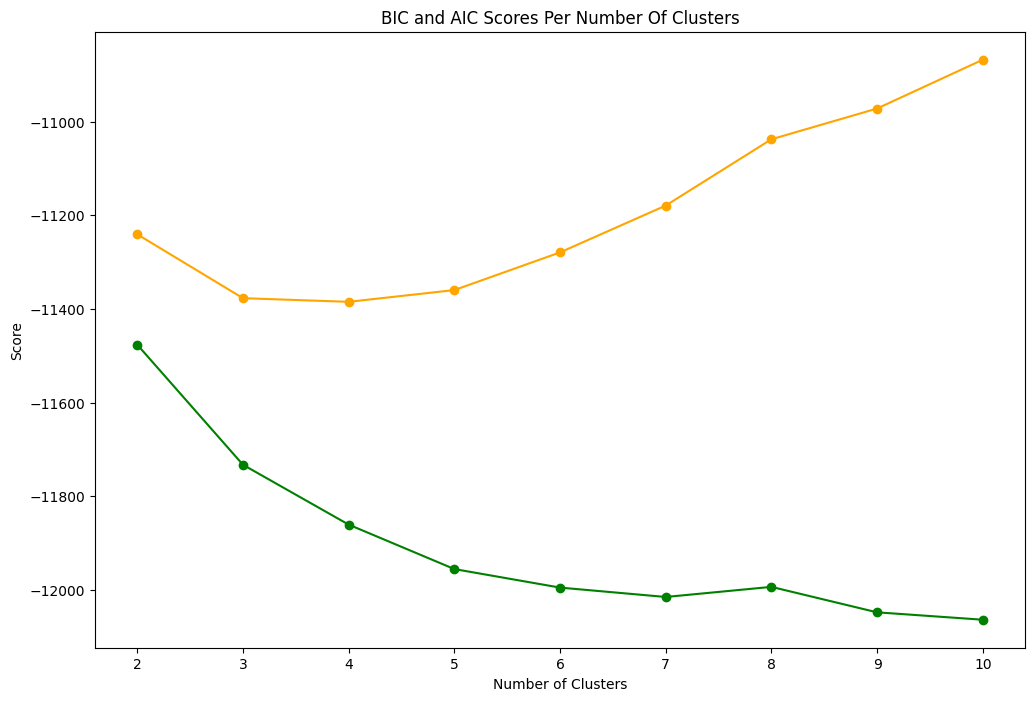

In [151]:
# Set up a range of cluster numbers to try
n_range = range(2,11)
# Create empty lists to store the BIC and AIC values
bic_score = []
aic_score = []

# Loop through the range and fit a model
for n in n_range:
    gm = GaussianMixture(n_components=n, 
                         random_state=123, 
                         n_init=10)
    gm.fit(df_color_mm_cl)
    
    # Append the BIC and AIC to the respective lists
    bic_score.append(gm.bic(df_color_mm_cl))
    aic_score.append(gm.aic(df_color_mm_cl))
    
# Plot the BIC and AIC values together
fig, ax = plt.subplots(figsize=(12,8),nrows=1)
ax.plot(n_range, bic_score, '-o', color='orange')
ax.plot(n_range, aic_score, '-o', color='green')
ax.set(xlabel='Number of Clusters', ylabel='Score')
ax.set_xticks(n_range)
ax.set_title('BIC and AIC Scores Per Number Of Clusters')

In [152]:
n_components = 4  # Number of clusters
covariance_types = ['full', 'tied', 'diag', 'spherical']

gmm_models_mm = {cov_type: GaussianMixture(n_components=n_components, covariance_type=cov_type)
              for cov_type in covariance_types}

for cov_type, gmm_model in gmm_models_mm.items():
    gmm_model.fit(df_color_mm_cl)


In [153]:
covariances_mm = {cov_type: gmm_model.covariances_
               for cov_type, gmm_model in gmm_models_mm.items()}

In [154]:
predictions_mm = {cov_type: gmm_model.predict(df_color_mm_cl)
               for cov_type, gmm_model in gmm_models_mm.items()}

Covariance Matrix (full - Component):
[[ 0.03368126  0.03376066  0.02906461 -0.0008118  -0.02328307  0.03406571]
 [ 0.03376066  0.03511275  0.03097249  0.00151248 -0.02596803  0.03437267]
 [ 0.02906461  0.03097249  0.02898249  0.00265709 -0.02512886  0.02973376]
 [-0.0008118   0.00151248  0.00265709  0.00541107 -0.00427686 -0.00024984]
 [-0.02328307 -0.02596803 -0.02512886 -0.00427686  0.02354595 -0.02400056]
 [ 0.03406571  0.03437267  0.02973376 -0.00024984 -0.02400056  0.0345236 ]]
Covariance Matrix (tied - Component):
[ 0.01948094  0.01965997  0.01649487  0.0012709  -0.01057529  0.02006496]
Covariance Matrix (diag - Component):
[0.00159871 0.00157763 0.0031625  0.0269538  0.00675908 0.00122272]
Covariance Matrix (spherical - Component):
0.0044119009049713226


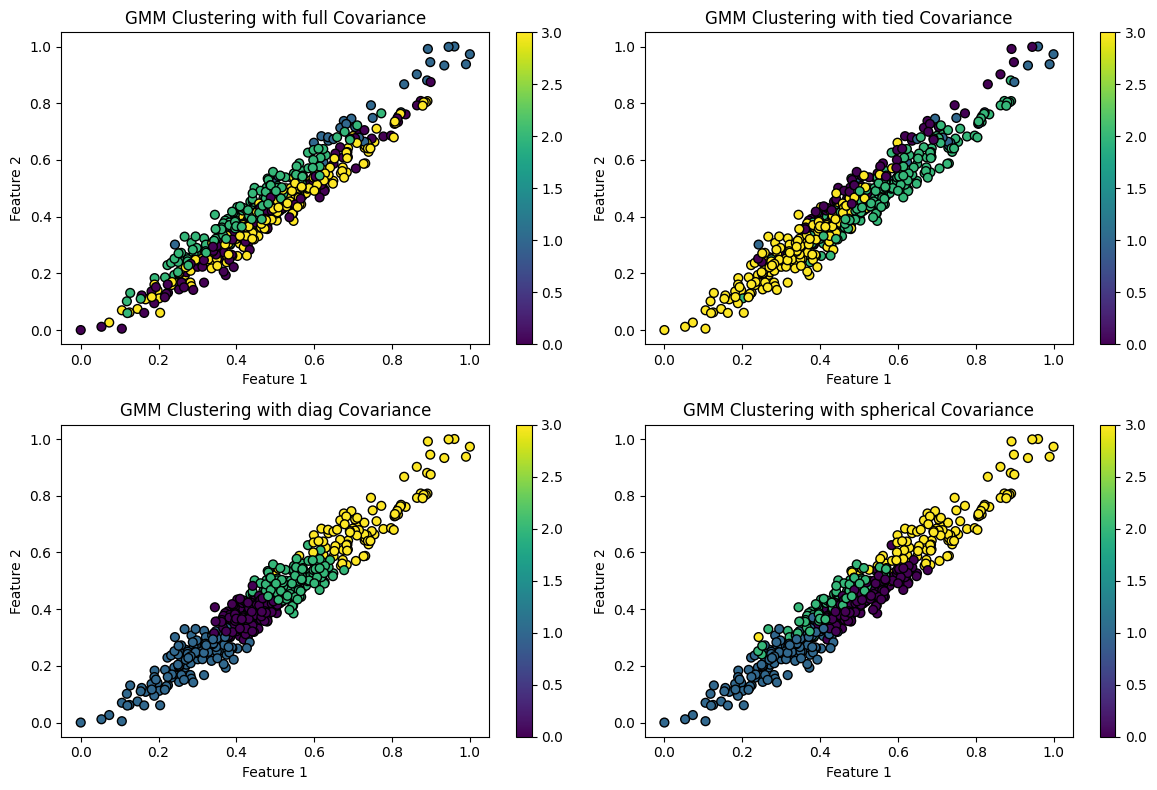

In [155]:
plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models_mm.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(df_color_mm_cl.iloc[:, 0], df_color_mm_cl.iloc[:, 1], c=predictions_mm[cov_type], cmap='viridis', edgecolors='k', s=40)
    plt.title(f'GMM Clustering with {cov_type} Covariance')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    
    print(f'Covariance Matrix ({cov_type} - Component):\n{covariances_mm[cov_type][0]}')

plt.tight_layout()
plt.show()

In [156]:
print("\n--- Silhouette Scores por tipo de covarianza ---")
for cov_type in covariance_types:
    score = silhouette_score(df_color_mm_cl, predictions_mm[cov_type])
    print(f"{cov_type.capitalize()} covariance: Silhouette Score = {score:.3f}")


--- Silhouette Scores por tipo de covarianza ---
Full covariance: Silhouette Score = 0.118
Tied covariance: Silhouette Score = 0.179
Diag covariance: Silhouette Score = 0.214
Spherical covariance: Silhouette Score = 0.329


c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


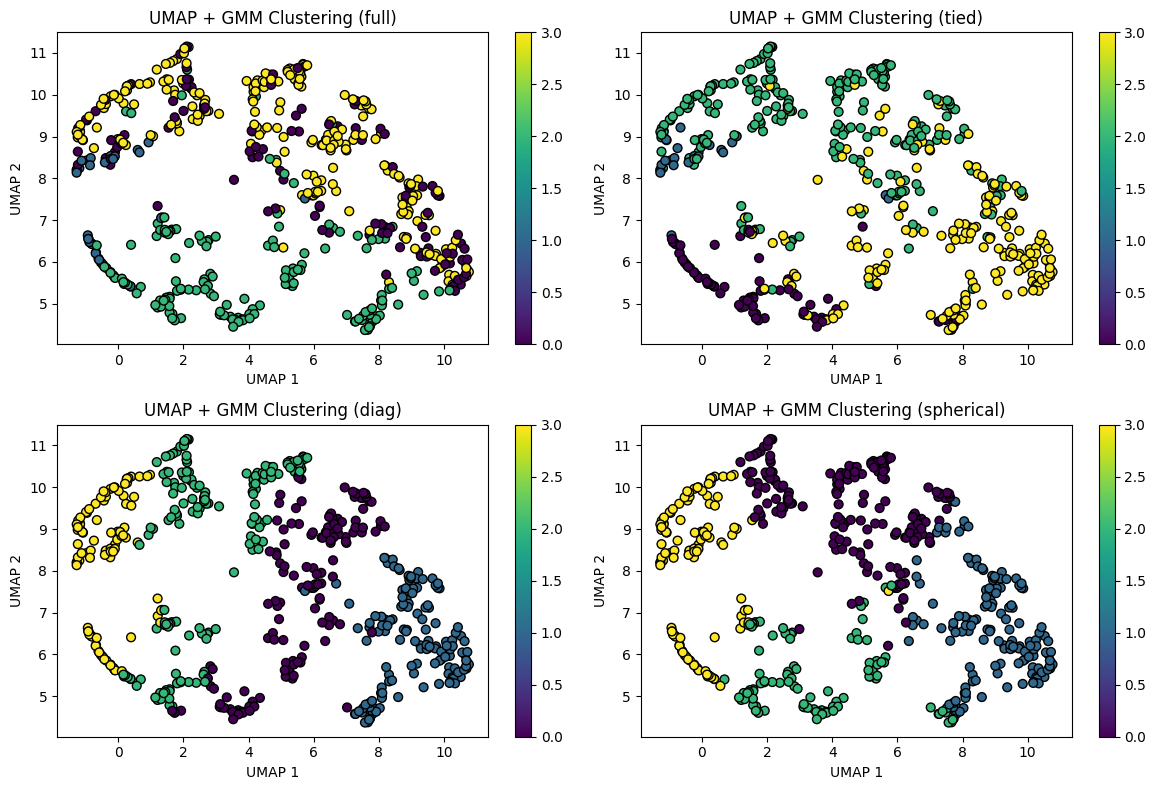

In [157]:
reducer = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
embedding = reducer.fit_transform(df_color_mm_cl)

plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models_mm.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(embedding[:, 0], embedding[:, 1], 
                c=predictions_mm[cov_type], 
                cmap='viridis', edgecolors='k', s=40)
    plt.title(f'UMAP + GMM Clustering ({cov_type})')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.colorbar()

plt.tight_layout()
plt.show()


In [158]:
df_color_mm['predictions_z_full'] = predictions_mm['full']
df_color_mm['predictions_z_tied'] = predictions_mm['tied']
df_color_mm['predictions_z_diag'] = predictions_mm['diag']
df_color_mm['predictions_z_spherical'] = predictions_mm['spherical']

# Crear las tablas de contingencia para cada tipo de covarianza
contingency_full = pd.crosstab(df_color_mm['label'], df_color_mm['predictions_z_full'], rownames=['Label'], colnames=['Cluster (full)'])
contingency_tied = pd.crosstab(df_color_mm['label'], df_color_mm['predictions_z_tied'], rownames=['Label'], colnames=['Cluster (tied)'])
contingency_diag = pd.crosstab(df_color_mm['label'], df_color_mm['predictions_z_diag'], rownames=['Label'], colnames=['Cluster (diag)'])
contingency_spherical = pd.crosstab(df_color_mm['label'], df_color_mm['predictions_z_spherical'], rownames=['Label'], colnames=['Cluster (spherical)'])

# Mostrar las tablas de contingencia
print("Contingency Table for Full Covariance:")
print(contingency_full)

print("\nContingency Table for Tied Covariance:")
print(contingency_tied)

print("\nContingency Table for Diagonal Covariance:")
print(contingency_diag)

print("\nContingency Table for Spherical Covariance:")
print(contingency_spherical)

Contingency Table for Full Covariance:
Cluster (full)   0   1   2    3
Label                          
higher          79   2  82  105
smaller         35  32  80  122

Contingency Table for Tied Covariance:
Cluster (tied)   0   1    2    3
Label                           
higher          25   0  106  137
smaller         59  25  139   46

Contingency Table for Diagonal Covariance:
Cluster (diag)   0   1   2   3
Label                         
higher          68  84  82  34
smaller         75  55  80  59

Contingency Table for Spherical Covariance:
Cluster (spherical)   0   1   2   3
Label                              
higher               93  88  44  43
smaller              86  59  54  70


reduccion de la dimensionalidad con umap y aplicar el clustering otra vez

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Covariance Matrix (full - Component 0):
[[1.75727139 0.66489183]
 [0.66489183 0.62638176]]
Covariance Matrix (tied - Component 0):
[ 2.26872392e+00 -1.13252179e-03]
Covariance Matrix (diag - Component 0):
[2.08901573 0.64012856]
Covariance Matrix (spherical - Component 0):
1.261908013907959


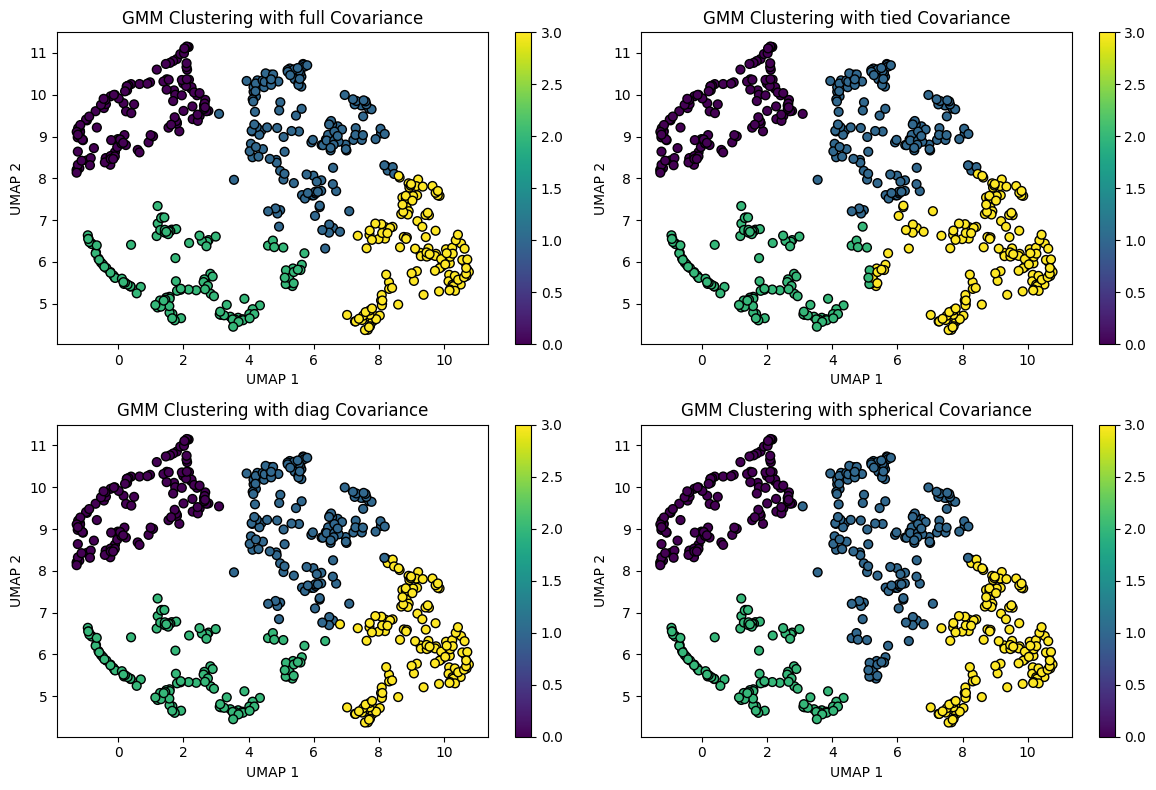

In [159]:
reducer = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
model_umap_color_mm = reducer.fit_transform(df_color_mm_cl)

# Clustering con GMM
n_components = 4
covariance_types = ['full', 'tied', 'diag', 'spherical']

gmm_models_mm_umap = {
    cov_type: GaussianMixture(n_components=n_components, covariance_type=cov_type, random_state=42)
    for cov_type in covariance_types
}

# Entrenar modelos
for cov_type, gmm_model in gmm_models_mm_umap.items():
    gmm_model.fit(model_umap_color_mm)

# Obtener matrices de covarianza
covariances_mm_umap = {
    cov_type: gmm_model.covariances_ for cov_type, gmm_model in gmm_models_mm_umap.items()
}

# Obtener predicciones
predictions_mm_umap = {
    cov_type: gmm_model.predict(model_umap_color_mm) for cov_type, gmm_model in gmm_models_mm_umap.items()
}

# Graficar
plt.figure(figsize=(12, 8))
for i, cov_type in enumerate(covariance_types, 1):
    plt.subplot(2, 2, i)
    plt.scatter(
        model_umap_color_mm[:, 0], model_umap_color_mm[:, 1],
        c=predictions_mm_umap[cov_type],
        cmap='viridis', edgecolors='k', s=40
    )
    plt.title(f'GMM Clustering with {cov_type} Covariance')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.colorbar()

    print(f'Covariance Matrix ({cov_type} - Component 0):\n{covariances_mm_umap[cov_type][0]}')

plt.tight_layout()
plt.show()

In [160]:
df_color_mm['gmm_umap_full'] = predictions_mm_umap['full']
df_color_mm['gmm_umap_tied'] = predictions_mm_umap['tied']
df_color_mm['gmm_umap_diag'] = predictions_mm_umap['diag']
df_color_mm['gmm_umap_spherical'] = predictions_mm_umap['spherical']

contingency_umap_full = pd.crosstab(df_color_mm['label'], df_color_mm['gmm_umap_full'], rownames=['Label'], colnames=['Cluster (UMAP - full)'])
contingency_umap_tied = pd.crosstab(df_color_mm['label'], df_color_mm['gmm_umap_tied'], rownames=['Label'], colnames=['Cluster (UMAP - tied)'])
contingency_umap_diag = pd.crosstab(df_color_mm['label'], df_color_mm['gmm_umap_diag'], rownames=['Label'], colnames=['Cluster (UMAP - diag)'])
contingency_umap_spherical = pd.crosstab(df_color_mm['label'], df_color_mm['gmm_umap_spherical'], rownames=['Label'], colnames=['Cluster (UMAP - spherical)'])

print("Contingency Table for UMAP + Full Covariance:")
print(contingency_umap_full)

print("\nContingency Table for UMAP + Tied Covariance:")
print(contingency_umap_tied)

print("\nContingency Table for UMAP + Diagonal Covariance:")
print(contingency_umap_diag)

print("\nContingency Table for UMAP + Spherical Covariance:")
print(contingency_umap_spherical)



Contingency Table for UMAP + Full Covariance:
Cluster (UMAP - full)   0   1   2   3
Label                                
higher                 54  72  59  83
smaller                72  84  65  48

Contingency Table for UMAP + Tied Covariance:
Cluster (UMAP - tied)   0   1   2   3
Label                                
higher                 55  65  52  96
smaller                72  78  63  56

Contingency Table for UMAP + Diagonal Covariance:
Cluster (UMAP - diag)   0   1   2   3
Label                                
higher                 55  69  59  85
smaller                72  78  66  53

Contingency Table for UMAP + Spherical Covariance:
Cluster (UMAP - spherical)   0   1   2   3
Label                                     
higher                      54  82  47  85
smaller                     72  90  58  49


In [165]:
# Calcular silueta para cada tipo de covarianza usando UMAP
for cov_type in covariance_types:
    labels = predictions_mm_umap[cov_type]
    score = silhouette_score(model_umap_color_mm, labels)
    print(f"Silhouette Score (UMAP + GMM {cov_type}): {score:.4f}")

Silhouette Score (UMAP + GMM full): 0.4920
Silhouette Score (UMAP + GMM tied): 0.4854
Silhouette Score (UMAP + GMM diag): 0.4960
Silhouette Score (UMAP + GMM spherical): 0.4937


c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Covariance Matrix (full - Component 0):
[[1.93565382 1.06650979]
 [1.06650979 1.01704149]]
Covariance Matrix (tied - Component 0):
[2.24736066 0.12498964]
Covariance Matrix (diag - Component 0):
[2.06698295 1.06991428]
Covariance Matrix (spherical - Component 0):
1.8153257770531945


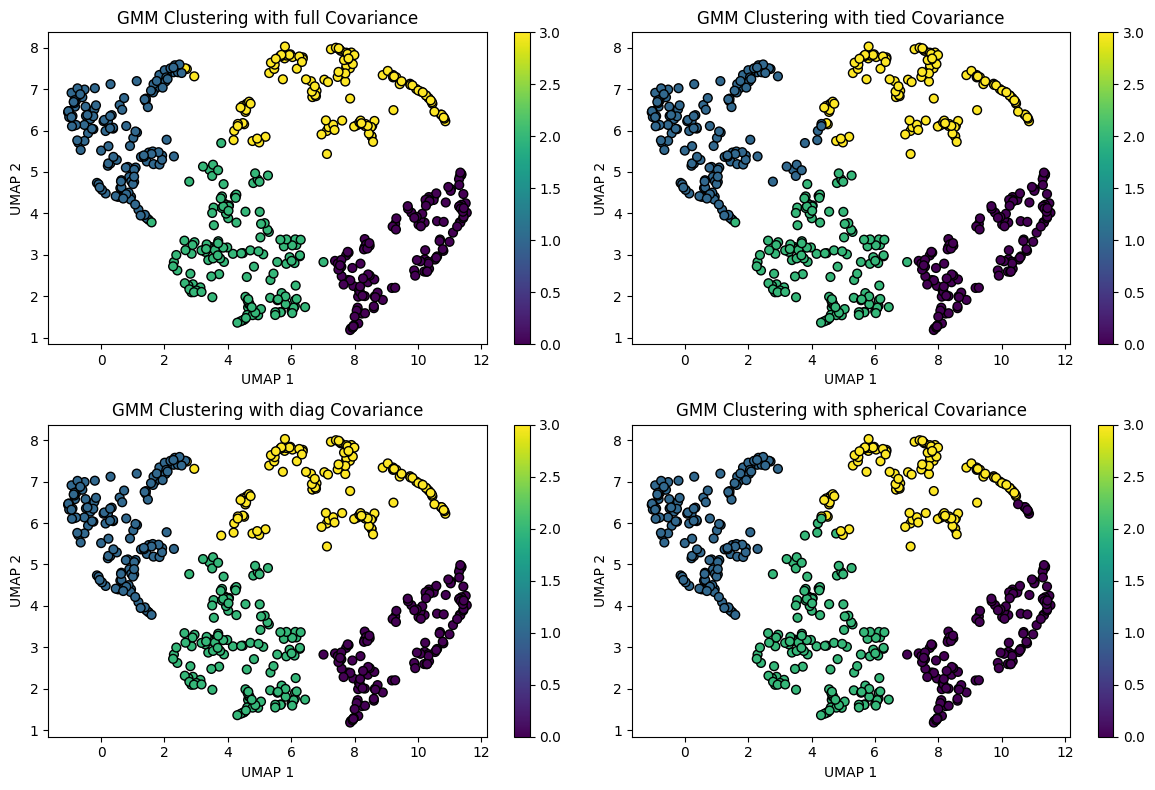

In [161]:
reducer = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
model_umap_color_z = reducer.fit_transform(df_color_z_cl)

# Clustering con GMM
n_components = 4
covariance_types = ['full', 'tied', 'diag', 'spherical']

gmm_models_z_umap = {
    cov_type: GaussianMixture(n_components=n_components, covariance_type=cov_type, random_state=42)
    for cov_type in covariance_types
}

# Entrenar modelos
for cov_type, gmm_model in gmm_models_z_umap.items():
    gmm_model.fit(model_umap_color_z)

# Obtener matrices de covarianza
covariances_z_umap = {
    cov_type: gmm_model.covariances_ for cov_type, gmm_model in gmm_models_z_umap.items()
}

# Obtener predicciones
predictions_z_umap = {
    cov_type: gmm_model.predict(model_umap_color_z) for cov_type, gmm_model in gmm_models_z_umap.items()
}

# Graficar
plt.figure(figsize=(12, 8))
for i, cov_type in enumerate(covariance_types, 1):
    plt.subplot(2, 2, i)
    plt.scatter(
        model_umap_color_z[:, 0], model_umap_color_z[:, 1],
        c=predictions_z_umap[cov_type],
        cmap='viridis', edgecolors='k', s=40
    )
    plt.title(f'GMM Clustering with {cov_type} Covariance')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.colorbar()

    print(f'Covariance Matrix ({cov_type} - Component 0):\n{covariances_z_umap[cov_type][0]}')

plt.tight_layout()
plt.show()

In [162]:
df_color_z['gmm_umap_full'] = predictions_z_umap['full']
df_color_z['gmm_umap_tied'] = predictions_z_umap['tied']
df_color_z['gmm_umap_diag'] = predictions_z_umap['diag']
df_color_z['gmm_umap_spherical'] = predictions_z_umap['spherical']

contingency_umap_full = pd.crosstab(df_color_z['label'], df_color_z['gmm_umap_full'], rownames=['Label'], colnames=['Cluster (UMAP - full)'])
contingency_umap_tied = pd.crosstab(df_color_z['label'], df_color_z['gmm_umap_tied'], rownames=['Label'], colnames=['Cluster (UMAP - tied)'])
contingency_umap_diag = pd.crosstab(df_color_z['label'], df_color_z['gmm_umap_diag'], rownames=['Label'], colnames=['Cluster (UMAP - diag)'])
contingency_umap_spherical = pd.crosstab(df_color_z['label'], df_color_z['gmm_umap_spherical'], rownames=['Label'], colnames=['Cluster (UMAP - spherical)'])

print("Contingency Table for UMAP + Full Covariance:")
print(contingency_umap_full)

print("\nContingency Table for UMAP + Tied Covariance:")
print(contingency_umap_tied)

print("\nContingency Table for UMAP + Diagonal Covariance:")
print(contingency_umap_diag)

print("\nContingency Table for UMAP + Spherical Covariance:")
print(contingency_umap_spherical)

Contingency Table for UMAP + Full Covariance:
Cluster (UMAP - full)   0   1   2   3
Label                                
higher                 54  84  69  61
smaller                72  50  80  67

Contingency Table for UMAP + Tied Covariance:
Cluster (UMAP - tied)   0   1   2   3
Label                                
higher                 54  90  67  57
smaller                72  58  75  64

Contingency Table for UMAP + Diagonal Covariance:
Cluster (UMAP - diag)   0   1   2   3
Label                                
higher                 55  85  67  61
smaller                72  51  79  67

Contingency Table for UMAP + Spherical Covariance:
Cluster (UMAP - spherical)   0   1   2   3
Label                                     
higher                      56  86  69  57
smaller                     78  52  82  57


In [163]:
# Calcular silueta para cada tipo de covarianza usando UMAP
for cov_type in covariance_types:
    labels = predictions_z_umap[cov_type]
    score = silhouette_score(model_umap_color_z, labels)
    print(f"Silhouette Score (UMAP + GMM {cov_type}): {score:.4f}")

Silhouette Score (UMAP + GMM full): 0.5096
Silhouette Score (UMAP + GMM tied): 0.5106
Silhouette Score (UMAP + GMM diag): 0.5122
Silhouette Score (UMAP + GMM spherical): 0.5148
